# **Dog Cat Classification using VGG16**

In [1]:
!nvidia-smi

Sat Mar 11 15:44:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow  as tf
print(tf.__version__)

2.11.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
# Reading the data 
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/Deep Learning/Dog-Cat Classification/cat-dog-project-20230311T094510Z-001/cat-dog-project/PetImages/train'
val_path = '/content/drive/MyDrive/Deep Learning/Dog-Cat Classification/cat-dog-project-20230311T094510Z-001/cat-dog-project/PetImages/validation'


In [6]:
#  importing the vgg16 library 

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3] , weights = 'imagenet' , include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [7]:
for layer in vgg16.layers:
  print(layer)

In [8]:
# don't train the existing weights

for layer in vgg16.layers:
  layer.trainable = False

In [9]:
for layer in vgg16.layers:
  print(layer.name , layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [10]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
folders = glob('/content/drive/MyDrive/Deep Learning/Dog-Cat Classification/cat-dog-project-20230311T094510Z-001/cat-dog-project/PetImages/train/*')

In [12]:
folders

['/content/drive/MyDrive/Deep Learning/Dog-Cat Classification/cat-dog-project-20230311T094510Z-001/cat-dog-project/PetImages/train/Dog',
 '/content/drive/MyDrive/Deep Learning/Dog-Cat Classification/cat-dog-project-20230311T094510Z-001/cat-dog-project/PetImages/train/Cat']

In [13]:
len(folders)

2

In [14]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 6,423,298
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
# Intialization of the cost function and the optimizer

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/Dog-Cat Classification/cat-dog-project-20230311T094510Z-001/cat-dog-project/PetImages/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                                 )

Found 337 images belonging to 2 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/Dog-Cat Classification/cat-dog-project-20230311T094510Z-001/cat-dog-project/PetImages/validation',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 59 images belonging to 2 classes.


In [20]:
# fit the model

r = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 20,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/20
11/11 [==============================] - 133s 11s/step - loss: 4.0605 - accuracy: 0.5638 - val_loss: 1.9436 - val_accuracy: 0.5085
Epoch 2/20
11/11 [==============================] - 6s 584ms/step - loss: 0.8680 - accuracy: 0.6528 - val_loss: 0.4721 - val_accuracy: 0.7627
Epoch 3/20
11/11 [==============================] - 5s 464ms/step - loss: 0.2919 - accuracy: 0.8813 - val_loss: 0.3424 - val_accuracy: 0.8305
Epoch 4/20
11/11 [==============================] - 5s 481ms/step - loss: 0.2021 - accuracy: 0.9347 - val_loss: 0.3490 - val_accuracy: 0.8305
Epoch 5/20
11/11 [==============================] - 5s 482ms/step - loss: 0.1412 - accuracy: 0.9703 - val_loss: 0.3788 - val_accuracy: 0.8644
Epoch 6/20
11/11 [==============================] - 6s 575ms/step - loss: 0.1460 - accuracy: 0.9525 - val_loss: 0.3794 - val_accuracy: 0.8475
Epoch 7/20
11/11 [==============================] - 5s 462ms/step - loss: 0.1346 - accuracy: 0.9466 - val_loss: 0.3540 - val_accuracy: 0.8305
Epoch 

In [21]:
import matplotlib.pyplot as plt

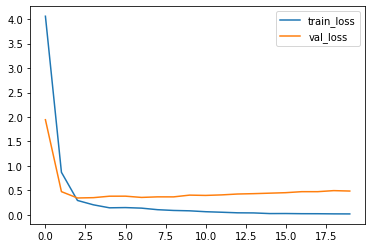

<Figure size 432x288 with 0 Axes>

In [22]:
# pllotting the loss

plt.plot(r.history['loss'],label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('lossvall_loss')

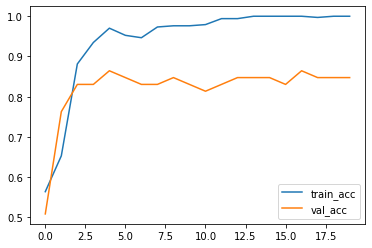

<Figure size 432x288 with 0 Axes>

In [23]:
# plotting the accuracy 
plt.plot(r.history['accuracy'],label = 'train_acc')
plt.plot(r.history['val_accuracy'],label = 'val_acc')
plt.legend()
plt.show()
plt.savefig('accuracyfig')

In [24]:
# Saving the model as h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [29]:
y_pred = model.predict(test_set)

2/2 [==============================] - 0s 237ms/step


In [30]:
y_pred

array([[9.4325137e-01, 5.6748629e-02],
       [3.4300620e-03, 9.9656999e-01],
       [9.9721223e-01, 2.7877567e-03],
       [7.8549898e-01, 2.1450102e-01],
       [5.9900153e-04, 9.9940097e-01],
       [8.7001771e-01, 1.2998229e-01],
       [2.8116754e-03, 9.9718827e-01],
       [9.3582904e-01, 6.4170897e-02],
       [9.9861610e-01, 1.3839437e-03],
       [8.4614879e-01, 1.5385124e-01],
       [9.8824477e-01, 1.1755186e-02],
       [6.2670833e-06, 9.9999368e-01],
       [9.1719842e-01, 8.2801595e-02],
       [9.8882967e-01, 1.1170302e-02],
       [1.6032360e-02, 9.8396772e-01],
       [9.9957973e-01, 4.2032212e-04],
       [3.8543418e-03, 9.9614561e-01],
       [9.8191607e-01, 1.8083978e-02],
       [7.1178429e-02, 9.2882150e-01],
       [9.5450544e-01, 4.5494542e-02],
       [3.8905168e-06, 9.9999607e-01],
       [9.9992430e-01, 7.5632583e-05],
       [9.9836761e-01, 1.6324377e-03],
       [9.9748409e-01, 2.5158608e-03],
       [2.0889721e-03, 9.9791104e-01],
       [2.3451464e-03, 9.

In [31]:
import numpy as np

y_pred = np.argmax(y_pred,axis = 1)

In [32]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [41]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [42]:
model = load_model('model_vgg16.h5')

In [43]:
img = image.load_img('/content/drive/MyDrive/Deep Learning/Dog-Cat Classification/cat-dog-project-20230311T094510Z-001/cat-dog-project/cat.jpg',target_size = (224,224))

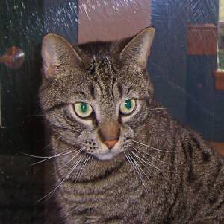

In [44]:
img

In [45]:
x = image.img_to_array(img)
x

array([[[ 36.,  41.,  37.],
        [ 38.,  42.,  41.],
        [ 38.,  42.,  43.],
        ...,
        [200., 200., 166.],
        [200., 198., 160.],
        [203., 201., 162.]],

       [[ 38.,  43.,  39.],
        [ 39.,  43.,  42.],
        [ 40.,  44.,  45.],
        ...,
        [208., 205., 172.],
        [205., 203., 165.],
        [204., 202., 163.]],

       [[ 42.,  47.,  43.],
        [ 40.,  44.,  43.],
        [ 40.,  44.,  45.],
        ...,
        [201., 198., 167.],
        [201., 196., 164.],
        [197., 193., 158.]],

       ...,

       [[ 30.,  28.,  29.],
        [ 24.,  22.,  23.],
        [ 21.,  19.,  20.],
        ...,
        [ 47.,  34.,  28.],
        [ 40.,  27.,  21.],
        [ 52.,  41.,  35.]],

       [[ 34.,  32.,  33.],
        [ 27.,  25.,  26.],
        [ 24.,  22.,  23.],
        ...,
        [ 45.,  32.,  24.],
        [ 44.,  31.,  23.],
        [ 65.,  55.,  46.]],

       [[ 30.,  28.,  29.],
        [ 26.,  24.,  25.],
        [ 24.,  

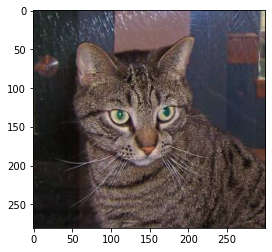

In [46]:
z = plt.imread('/content/drive/MyDrive/Deep Learning/Dog-Cat Classification/cat-dog-project-20230311T094510Z-001/cat-dog-project/cat.jpg')
plt.imshow(z)

In [47]:
x.shape

(224, 224, 3)

In [48]:
x = x/255

In [50]:
from keras.applications.vgg16 import preprocess_input

In [51]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [52]:
model.predict(img_data)

1/1 [==============================] - 1s 841ms/step


array([[0.92074233, 0.0792577 ]], dtype=float32)

In [53]:
result = np.argmax(model.predict(img_data) , axis = 1)

1/1 [==============================] - 0s 21ms/step


In [55]:
result[0]

0

In [56]:
if result[0] ==1:
  prediction = 'dog'
  print(prediction)
else:
  prediction = 'cat'
  print(prediction)

cat
